# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
d = pd.read_csv('amazon_reviews.csv', low_memory=False)
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(d['review'].values.astype('U'))
frequencies = sum(sparse_matrix).toarray()[0]
df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['Frequency'])
df

,Frequency
000 can customize,7
10 for sure,7
100k clicks my,7
1ms response time,7
1st was naga,7
...,...
you know which,7
you re on,7
you the option,7
your computer for,7


In [ ]:
import csv
with open('amazon_reviews.csv') as f:
    reader = csv.reader(f)
    next(reader, None)
    review_content = [row[0] for row in reader]
with open('review_content.txt', mode="w") as outfile:
    for s in review_content:
        outfile.write("%s\n" % s)
def bigramEstimation(file):
    lst = []
    unigrams = {}
    bigrams = {}
    text = open(file, 'r').read()
    lst = text.strip().split()
    del text
    for l in lst:
        if not l in unigrams:
            unigrams[l] = 1
        else:
            unigrams[l] += 1
    for i in range(len(lst) - 1):
        temp = (lst[i], lst[i+1])
        if not temp in bigrams:
            bigrams[temp] = 1
        else:
            bigrams[temp]+=1
    print('Generated ', len(bigrams), ' bigrams')
    total_corpus = sum(unigrams.values())
    for k,v in bigrams.items():
        first_word = k[0]
        first_word_count = unigrams[first_word]
        bi_prob = bigrams[k] / unigrams[first_word]
        if(v == 2):
         print(k[0] ,k[1],v ,bi_prob)

In [ ]:
import spacy
import csv
from tabulate import tabulate


nlp = spacy.load("en_core_web_sm")
f = open("review_content.txt", "r")
doc = nlp(f.read())
noun_phrases = []
for np in doc.noun_chunks:
  noun_phrases.append(np.text)
print(noun_phrases)
dfn = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
word_vectorizer = CountVectorizer(ngram_range=(2,7), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(dfn['noun_phrases'].values.astype('U'))
frequencies = sum(sparse_matrix).toarray()[0]
dff = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['Frequency'])
dff['Probability'] = dff['Frequency'] / dff['Frequency'].max()
result = dff.astype(object).transpose()
result

['I', 'many Razer products', 'my experience', 'Razer', 'every single product', 'I', 'some sort', 'fatal problem', 'normal use', 'I', 'them', 'one last chance', 'I', 'their Synapse program', 'you', 'control', 'everything', 'they', 'relatively good quality products', 'This Wireless Viper Ultimate', 'very low delay', 'It', 'the hand', 'the left and right clicks', 'just the perfect force', 'Some', 'their other mice', 'you', 'the option', 'the force', 'this one', 'they', 'it', 'a sweets spot', 'One thing', 'I', 'the mouse', 'the USB receiver', 'the charging dock', 'you', '2 USB slots', 'your computer', 'the charging dock', 'The mouse', 'I', 'it', 'time', 'It', 'the hand', 'I', 'one (avoidable) issue', 'that', 'this mouse', 'both hands', 'it', 'the side buttons', 'the left', 'the right side', 'I', 'it', 'the 2 side buttons', 'mistake', 'your pinky', 'ring finger', 'My solution', 'them', 'Razer Synapse', 'it', 'those extra buttons', 'a way', 'both', 'handed and right handed people', 'them', '

,100k clicks,1ms response,1ms response time,2nd razer,2nd razer mouse,adhesive side,adjustment button,all that,all their,all their other,...,viper ultimate optical sensor,which sensitivity,wireless convenience,wireless gaming,wireless gaming mouse,wireless technology,wireless viper,wireless viper ultimate,your computer,your pinky
Frequency,7,7,7,7,7,7,7,7,7,7,...,7,7,7,14,14,14,7,7,7,7
Probability,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,...,0.142857,0.142857,0.142857,0.285714,0.285714,0.285714,0.142857,0.142857,0.142857,0.142857


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
df = pd.read_csv("amazon_reviews.csv")
tf2 = df.dropna()
tf1 = (tf2['review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index())
tf1.columns = ['Word','Term_Frequency']
tf1

,Word,Term_Frequency
0,the,294.0
1,and,224.0
2,to,126.0
3,is,126.0
4,have,56.0
...,...,...
475,freedom,7.0
476,enhances,7.0
477,gameplay,7.0
478,gives,7.0


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
doc_set = tf2['review'].values.tolist()
query_set = "MCU aside, this movie stands alone as an epic masterpiece on its own! The fight scenes were visually stunning, great acting, great story highly reccomend!"
query_set = [query_set]
stopWords = stopwords.words('english')
vectorizer = CountVectorizer(stop_words = stopWords)
transformer = TfidfTransformer()
docVectorizerArray = vectorizer.fit_transform(doc_set).toarray()
queryVectorizerArray = vectorizer.transform(query_set).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
result = []
for vector in docVectorizerArray:
        for testV in queryVectorizerArray:
            cosine = cx(vector, testV)
            result.append(cosine)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
n = tf2.filter(['Unnamed','review'], axis=1)
se = pd.Series(result)
n['Cos-similarity'] = se.values
n.drop(n.loc[n['Cos-similarity']==0].index, inplace=True)
n["Rank"] = n["Cos-similarity"].rank().astype(int)
n.sort_values("Cos-similarity", inplace = True)
n

,review,Cos-similarity,Rank
2,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
5,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
8,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
11,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
14,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
17,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
20,he Razer Viper Ultimate Hyperspeed Wireless Ga...,0.017650,4
1,This mouse has multiple DPI settings which are...,0.094281,11
4,This mouse has multiple DPI settings which are...,0.094281,11
7,This mouse has multiple DPI settings which are...,0.094281,11


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

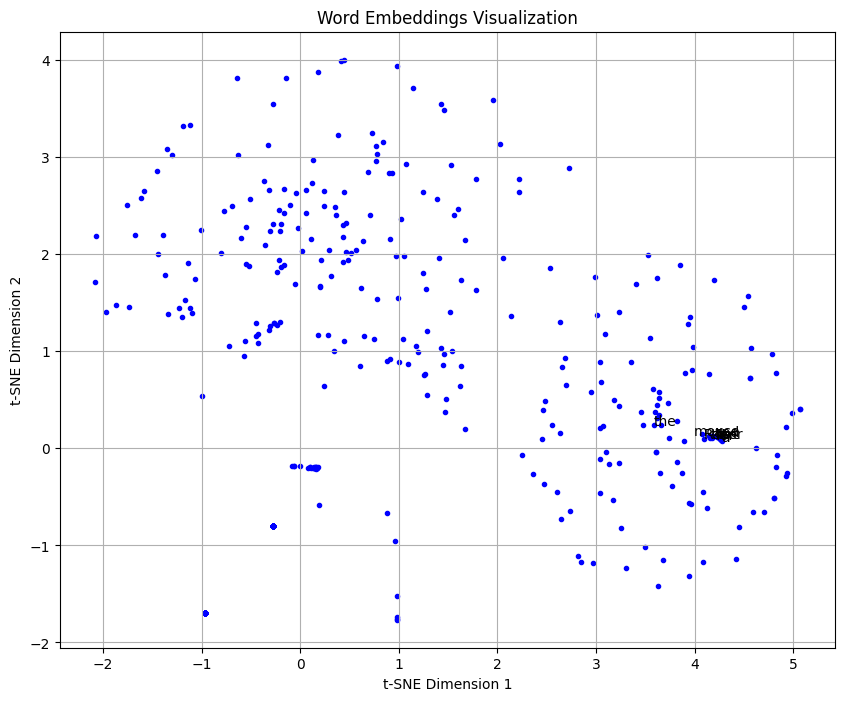

In [ ]:
# Import necessary libraries
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataset from assignment 2
# Assuming you have a DataFrame with a column named 'text'
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('/content/amazon_reviews.csv')

# Preprocessing function to tokenize the text and convert it into a list of words
def preprocess_text(text):
    # Add your text preprocessing steps here
    # For example, tokenization, removing stopwords, punctuation, etc.
    return text.split()

# Apply preprocessing to your text data
data['tokenized_text'] = data['review'].apply(preprocess_text)

# Train Word2Vec model
model = Word2Vec(sentences=data['tokenized_text'], vector_size=300, window=5, min_count=1, workers=4)

# Visualize word embeddings
# Extract vectors and corresponding words
words = list(model.wv.index_to_key)
vectors = model.wv[words]

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Annotate some random words for better visualization
num_annotated_words = 10
for i in range(num_annotated_words):
    plt.annotate(words[i], xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(3, 3),
                 textcoords='offset points', ha='center', va='center')

plt.title('Word Embeddings Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/pathanivijay/INFO-5731/tree/main/Assignment-3



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
The work looks thorough, encompassing a variety of basic NLP methods.
It will be difficult to apply all of the techniques efficiently, especially when building sentiment analysis datasets, in my opinion.
But I'm looking forward to seeing how these concepts are used and obtaining real-world experience in them.
Though the tasks appear realistic in terms of time, rigorous time management may be necessary due to their intricacy in order to ensure that
the allotted time is completed.

'''